In [1]:
from __future__ import division
import numpy as np
from acoustics.signal import EqualBand, OctaveBand, Signal, Spectrum
from acoustics.generator import Generator
import matplotlib.pyplot as plt

In [20]:
fs = 44100
duration = 10


gen = Generator(fs, duration)
#noise = gen.pink()
noise, _ = gen.sine_sweep(50., 10000.)
noise = noise[None, ...]
N = noise.shape[-1]
print N

441000


Shape of the generated signal : (1L, 441000L). Number of freq bands : 18
Octave band [ 100.]


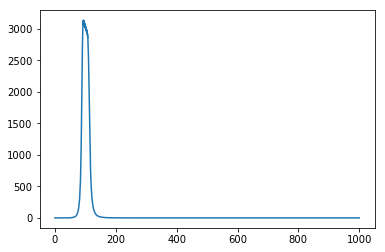

18


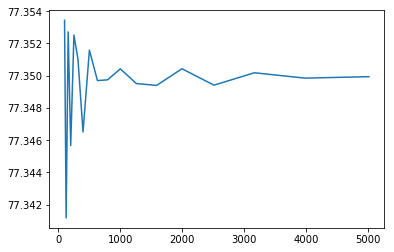

In [21]:
channels = 1
s = Signal()


#signal = np.random.randn(channels, sequence_length)
signal = noise
frequencies = OctaveBand(fstart=100., fstop=5000., fraction=3)
print ("Shape of the generated signal : {0}. Number of freq bands : {1}").format(signal.shape, frequencies.center.size)

filtered_signal = s.bandpass_fractional_octaves(signal, fs, frequencies)
filtered_signal_indices = filtered_signal[0]
filtered_signal_octaves = filtered_signal[1]

n=0
print ("Octave band {0}").format(filtered_signal_indices[n])
spectra = abs(np.fft.rfft(filtered_signal_octaves[n, 0, ...]))
spectra_indices = np.fft.fftfreq(N, 1/fs)
plt.plot(spectra_indices[:10000], spectra[:10000])
plt.show()

channel = 0
ss = Spectrum()
#octave_bands, octave_bands_level = ss.fractional_octaves(signal, start=100., fs=fs)
octave_bands, octave_bands_level = ss.third_octaves(signal, fs, frequencies=frequencies.center)
print octave_bands.center.size
plt.plot(octave_bands.center, octave_bands_level[channel])
plt.show()

(441000L,)


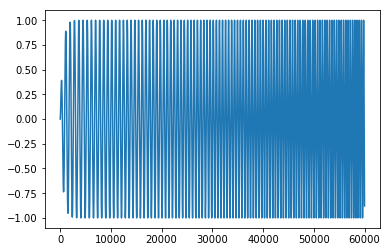

In [19]:
sine_sweep, reverse_sweep = gen.sine_sweep(50., 10000.)
print sine_sweep.shape
plt.plot(sine_sweep[:60000])
plt.show()

[  100.           125.89254118   158.48931925   199.5262315    251.18864315
   316.22776602   398.10717055   501.18723363   630.95734448   794.32823472
  1000.          1258.92541179  1584.89319246  1995.26231497  2511.88643151
  3162.27766017  3981.07170553  5011.87233627]


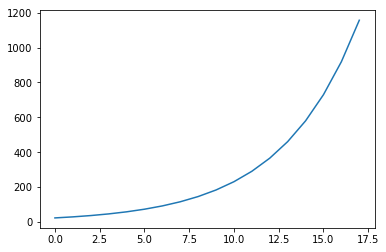

[  125.89254118   251.18864315   501.18723363  1000.          1995.26231497
  3981.07170553]


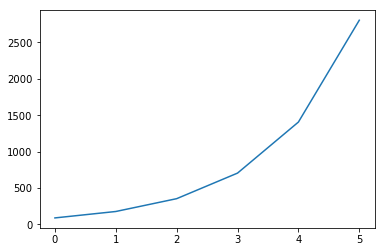

In [4]:
a = range(10)
a = np.asarray(a)
e = EqualBand(center=a)

frequencies = OctaveBand(fstart=100.0, fstop=5000.0, fraction=3)
print frequencies.center
plt.plot(range(frequencies.center.size), frequencies.bandwidth)
plt.show()

frequencies = OctaveBand(fstart=100.0, fstop=5000.0, fraction=1)
print frequencies.center
plt.plot(range(frequencies.center.size), frequencies.bandwidth)
plt.show()

In [37]:
a = np.arange(1, 5, 1)
b = np.arange(11, 15, 1)
c = np.vstack((a, b))
print c
print c[-2]

[[ 1  2  3  4]
 [11 12 13 14]]
[1 2 3 4]


In [5]:
from acoustics.signal import Signal

SyntaxError: invalid syntax (<ipython-input-5-3f4e4a420f96>, line 1)

In [5]:
from scipy.fftpack import fft, ifft

In [ ]:
np.fft.fft